## Loading MNIST

In [10]:
from keras.datasets import mnist
(x_train,_),(x_test,_)=mnist.load_data()

### Checking Dimensions 

In [11]:
print(x_train.shape)

(60000, 28, 28)


### Image Pre-processing 

In [12]:
def pre_process(X):
    X = X/255.0
    X = X.reshape((len(X), 784))
    return X

x_train  =  pre_process(x_train)
x_test  =  pre_process(x_test)

print("X_train", x_train.shape)
print("X_test", x_test.shape)

X_train (60000, 784)
X_test (10000, 784)


### Visualized the training images  

In [13]:
import matplotlib.pyplot as plt
def show_data(X, n=10, height=28, width=28, title=""):
    plt.figure(figsize=(20, 5))
    for i in range(n):
        ax = plt.subplot(2,n,i+1)
        plt.imshow(X[i].reshape((height,width)))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.suptitle(title, fontsize = 20)

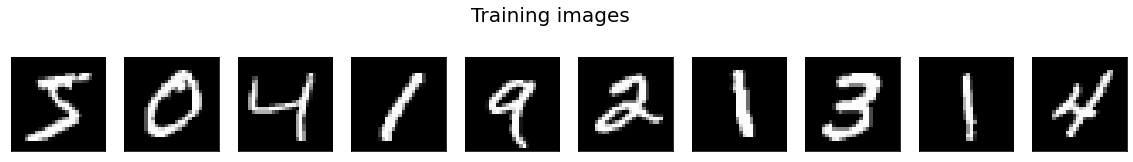

In [14]:
show_data(x_train,title="Training images")

### Building the Stacked Autoencoder

- Input layer          = 784 neurons
- Hidden layer_1       =  256 neurons

- Code layer           =   48 neurons
- Hidden layer_2       =  256 neurons

- Output layer         = 784 neurons

In [15]:
from keras.layers import Input, Dense
from keras.models import Model

In [16]:
# encoder
input_layer = Input(shape=(784,), name="INPUT")
hidden_layer_1 = Dense(256, activation='relu', name="HIDDEN_1")(input_layer)


# code
code_layer = Dense(100, activation='relu', name="CODE")(hidden_layer_1)

# decoder

hidden_layer_2 = Dense(256, activation='relu', name="HIDDEN_4")(code_layer)
output_layer = Dense(784, activation='sigmoid', name="OUTPUT")(hidden_layer_2)

### Compiling the layers 

In [17]:
stacked_autoencoder=Model(input_layer, output_layer)
stacked_autoencoder.compile(optimizer="Adam",loss="binary_crossentropy")
stacked_autoencoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
INPUT (InputLayer)           [(None, 784)]             0         
_________________________________________________________________
HIDDEN_1 (Dense)             (None, 256)               200960    
_________________________________________________________________
CODE (Dense)                 (None, 100)               25700     
_________________________________________________________________
HIDDEN_4 (Dense)             (None, 256)               25856     
_________________________________________________________________
OUTPUT (Dense)               (None, 784)               201488    
Total params: 454,004
Trainable params: 454,004
Non-trainable params: 0
_________________________________________________________________


### Fit into the neural network

In [18]:
stacked_autoencoder.fit(x_train, x_train, epochs=100, batch_size=256,shuffle=True,
                        validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 8s 31ms/step - loss: 0.2913 - val_loss: 0.1149
Epoch 2/100
235/235 [==============================] - 7s 28ms/step - loss: 0.1096 - val_loss: 0.0946
Epoch 3/100
235/235 [==============================] - 7s 28ms/step - loss: 0.0938 - val_loss: 0.0871
Epoch 4/100
235/235 [==============================] - 7s 30ms/step - loss: 0.0870 - val_loss: 0.0828
Epoch 5/100
235/235 [==============================] - 7s 29ms/step - loss: 0.0834 - val_loss: 0.0805
Epoch 6/100
235/235 [==============================] - 7s 29ms/step - loss: 0.0805 - val_loss: 0.0781
Epoch 7/100
235/235 [==============================] - 7s 29ms/step - loss: 0.0786 - val_loss: 0.0769
Epoch 8/100
235/235 [==============================] - 6s 27ms/step - loss: 0.0773 - val_loss: 0.0758
Epoch 9/100
235/235 [==============================] - 6s 26ms/step - loss: 0.0761 - val_loss: 0.0749
Epoch 10/100
235/235 [==============================] - 7s 29ms/step - loss: 0.075

235/235 [==============================] - 6s 27ms/step - loss: 0.0668 - val_loss: 0.0667
Epoch 81/100
235/235 [==============================] - 6s 25ms/step - loss: 0.0665 - val_loss: 0.0670
Epoch 82/100
235/235 [==============================] - 6s 25ms/step - loss: 0.0666 - val_loss: 0.0668
Epoch 83/100
235/235 [==============================] - 6s 25ms/step - loss: 0.0667 - val_loss: 0.0669
Epoch 84/100
235/235 [==============================] - 7s 29ms/step - loss: 0.0667 - val_loss: 0.0667
Epoch 85/100
235/235 [==============================] - 7s 29ms/step - loss: 0.0668 - val_loss: 0.0668
Epoch 86/100
235/235 [==============================] - 7s 30ms/step - loss: 0.0666 - val_loss: 0.0668
Epoch 87/100
235/235 [==============================] - 7s 29ms/step - loss: 0.0667 - val_loss: 0.0667
Epoch 88/100
235/235 [==============================] - 6s 27ms/step - loss: 0.0666 - val_loss: 0.0666
Epoch 89/100
235/235 [==============================] - 6s 27ms/step - loss: 0.0667 - 

### Predicting 

In [19]:
decoded_data = stacked_autoencoder.predict(x_test)

### Visualization 

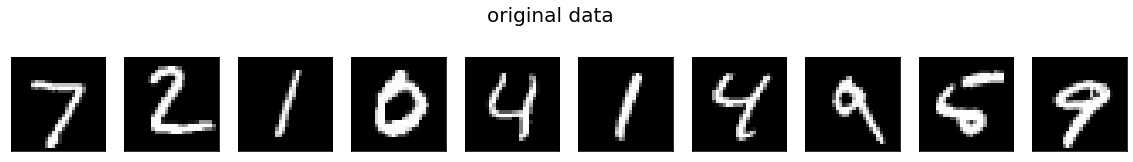

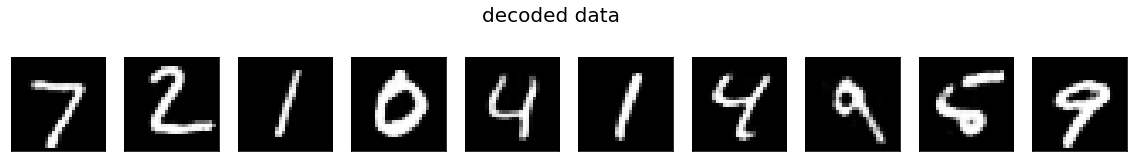

In [20]:
show_data(x_test, title="original data")
show_data(decoded_data, title="decoded data")